In [5]:
import pandas as pd

import numpy as np 
import warnings

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load dataset
path="C:/Users/tarak/Downloads/400_patients_dataset.csv"
data = pd.read_csv(path)
print(data)


    Age Blood Pressure Specific Gravity Albumin Sugar Red Blood Cells  \
0    48             80             1.02       1     0               ?   
1     7             50             1.02       4     0               ?   
2    62             80             1.01       2     3          normal   
3    48             70            1.005       4     0          normal   
4    51             80             1.01       2     0          normal   
..   ..            ...              ...     ...   ...             ...   
395  55             80             1.02       0     0          normal   
396  42             70            1.025       0     0          normal   
397  12             80             1.02       0     0          normal   
398  17             60            1.025       0     0          normal   
399  58             80            1.025       0     0          normal   

     Pus Cell Pus Cell clumps    Bacteria Blood Glucose Random  ...  \
0      normal      notpresent  notpresent           

In [6]:
# Strip extra spaces from column names
data.columns = data.columns.str.strip()

# Map categorical columns to binary values
mapping_dict = {
    'Red Blood Cells': {'normal': 1, 'abnormal': 0},
    'Pus Cell': {'normal': 1, 'abnormal': 0},
    'Pus Cell clumps': {'present': 1, 'notpresent': 0},
    'Bacteria': {'present': 1, 'notpresent': 0},
    'Hypertension': {'yes': 1, 'no': 0},
    'Diabetes Mellitus': {'yes': 1, 'no': 0},
    'Coronary Artery Disease': {'yes': 1, 'no': 0},
    'Appetite': {'good': 1, 'poor': 0},
    'Pedal Edema': {'yes': 1, 'no': 0},
    'Anemia': {'yes': 1, 'no': 0},
    'Class': {'ckd': 1, 'notckd': 0}
}

# Apply the mappings
for column, mapping in mapping_dict.items():
    if column in data.columns:
        data[column] = data[column].map(mapping)
print(data)

    Age Blood Pressure Specific Gravity Albumin Sugar  Red Blood Cells  \
0    48             80             1.02       1     0              NaN   
1     7             50             1.02       4     0              NaN   
2    62             80             1.01       2     3              1.0   
3    48             70            1.005       4     0              1.0   
4    51             80             1.01       2     0              1.0   
..   ..            ...              ...     ...   ...              ...   
395  55             80             1.02       0     0              1.0   
396  42             70            1.025       0     0              1.0   
397  12             80             1.02       0     0              1.0   
398  17             60            1.025       0     0              1.0   
399  58             80            1.025       0     0              1.0   

     Pus Cell  Pus Cell clumps  Bacteria Blood Glucose Random  ...  \
0         1.0              0.0       0.0 

In [7]:
# Replace '?' with NaN
data.replace("?", np.nan, inplace=True)
data.replace(r'\t\?', pd.NA, regex=True, inplace=True)
# Convert columns to numeric (if possible), forcing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop the unnecessary column if it exists
if 'Unnamed: 25' in data.columns:
    data.drop(columns=['Unnamed: 25'], inplace=True)

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Fill missing values
for col in numerical_cols:
    data[col] = data[col].astype(float)  # Convert to float (if needed)
    data[col].fillna(data[col].median(), inplace=True)# median

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)# mode
print(data)

      Age  Blood Pressure  Specific Gravity  Albumin  Sugar  Red Blood Cells  \
0    48.0            80.0             1.020      1.0    0.0              1.0   
1     7.0            50.0             1.020      4.0    0.0              1.0   
2    62.0            80.0             1.010      2.0    3.0              1.0   
3    48.0            70.0             1.005      4.0    0.0              1.0   
4    51.0            80.0             1.010      2.0    0.0              1.0   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0              1.0   
396  42.0            70.0             1.025      0.0    0.0              1.0   
397  12.0            80.0             1.020      0.0    0.0              1.0   
398  17.0            60.0             1.025      0.0    0.0              1.0   
399  58.0            80.0             1.025      0.0    0.0              1.0   

     Pus Cell  Pus Cell clumps  Bacteri

In [8]:
categorical_columns = [
    'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
    'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
    'Appetite', 'Pedal Edema', 'Anemia', 'Class'
]

# Convert specified columns**(float)** to int
for column in categorical_columns:
    data[column] = data[column].astype(int)

print(data)

      Age  Blood Pressure  Specific Gravity  Albumin  Sugar  Red Blood Cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                1   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     Pus Cell  Pus Cell clumps  Bacteri

In [9]:
print(data.isnull().sum())

Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed  Cell Volume        0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64


In [10]:
# Convert float columns with only whole numbers to int
for col in numerical_cols:
    if all(data[col] == data[col].astype(int)):  # Check if all values are whole numbers
        data[col] = data[col].astype(int)

print(data.dtypes)  # Verify the data types
print(data)  # Print the dataset

Age                          int32
Blood Pressure               int32
Specific Gravity           float64
Albumin                      int32
Sugar                        int32
Red Blood Cells              int32
Pus Cell                     int32
Pus Cell clumps              int32
Bacteria                     int32
Blood Glucose Random         int32
Blood Urea                 float64
Serum Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed  Cell Volume          int32
White Blood Cell Count       int32
Red Blood Cell Count       float64
Hypertension                 int32
Diabetes Mellitus            int32
Coronary Artery Disease      int32
Appetite                     int32
Pedal Edema                  int32
Anemia                       int32
Class                        int32
dtype: object
     Age  Blood Pressure  Specific Gravity  Albumin  Sugar  Red Blood Cells  \
0     48              80        

In [11]:

# Save the processed data to a CSV file
data.to_csv("patients400_dataset_cleaned_all.csv", index=False)


🔹 Selected Features using RFE with Importance (%):
Packed  Cell Volume: 18.71%
Hemoglobin: 18.49%
Serum Creatinine: 17.26%
Specific Gravity: 12.14%
Red Blood Cell Count: 10.27%
Albumin: 9.25%
Diabetes Mellitus: 6.42%
Sodium: 2.96%
Blood Glucose Random: 2.89%
Hypertension: 1.61%


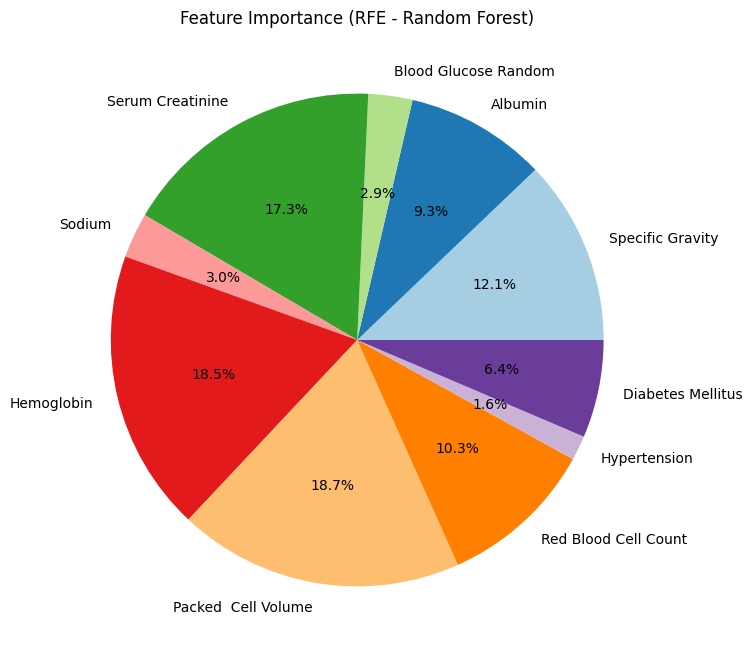

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("patients400_dataset_cleaned_all.csv")
X = df.drop(columns=['Class'])
y = df['Class']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using RFE with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rfe = RFE(estimator=rf_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get feature importance for RFE-selected features
feature_importance_rfe = rf_model.feature_importances_[rfe.support_]
feature_importance_rfe /= feature_importance_rfe.sum()  # Normalize to percentages

selected_features_rfe = X.columns[rfe.support_]
rfe_importance = dict(zip(selected_features_rfe, feature_importance_rfe * 100))  # Convert to percentages

print("\n🔹 Selected Features using RFE with Importance (%):")
for feature, importance in sorted(rfe_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.2f}%")

# Plot Pie Chart for RFE Feature Importance
plt.figure(figsize=(8, 8))
plt.pie(rfe_importance.values(), labels=rfe_importance.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Feature Importance (RFE - Random Forest)")
plt.show()
